<a href="https://colab.research.google.com/github/ERISANCHEZ1/Challenge_telecom_x_parte_2_esanchez/blob/main/Callenge_telecomX_analisis_de_evasi%C3%B3n_de_clientes_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Challenge Telecom X: análisis de evasión de clientes**
# ERIKA DAYANA SÁNCHEZ SEPÚLVEDA


In [2]:
import requests
import pandas as pd

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

In [3]:
response = requests.get(url)
response.raise_for_status()

data = response.json()

df = pd.DataFrame(data)
print(df.head())
print(df.info())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

**paso # 2**

In [4]:
customer_df = df['customer'].apply(pd.Series)
phone_df    = df['phone'].apply(pd.Series)
internet_df = df['internet'].apply(pd.Series)
account_df  = df['account'].apply(pd.Series)


df_flat = pd.concat(
    [df[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df],
    axis=1
)


df_flat.info()
df_flat.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7267 non-null   object
 1   Churn             7267 non-null   object
 2   gender            7267 non-null   object
 3   SeniorCitizen     7267 non-null   int64 
 4   Partner           7267 non-null   object
 5   Dependents        7267 non-null   object
 6   tenure            7267 non-null   int64 
 7   PhoneService      7267 non-null   object
 8   MultipleLines     7267 non-null   object
 9   InternetService   7267 non-null   object
 10  OnlineSecurity    7267 non-null   object
 11  OnlineBackup      7267 non-null   object
 12  DeviceProtection  7267 non-null   object
 13  TechSupport       7267 non-null   object
 14  StreamingTV       7267 non-null   object
 15  StreamingMovies   7267 non-null   object
 16  Contract          7267 non-null   object
 17  PaperlessBilli

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


PASO # 3


In [5]:
df_flat.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [6]:
duplicados = df_flat.astype(str).duplicated().sum()
duplicados_id = df_flat['customerID'].duplicated().sum()

print(f"Duplicados totales: {duplicados}")
print(f"Duplicados en customerID: {duplicados_id}")

Duplicados totales: 0
Duplicados en customerID: 0


PASO 4

In [7]:
for col in df_flat.select_dtypes(include='object').columns:
    df_flat[col] = df_flat[col].astype(str).str.strip().str.lower()

In [8]:
import numpy as np
df_flat['Charges'] = df_flat['Charges'].replace(['', ' ', 'nan'], np.nan)

df_flat['Charges'] = pd.to_numeric(df_flat['Charges'], errors='coerce')

In [9]:
df_flat.drop(columns=['Charges'], inplace=True)


In [10]:
duplicados_id = df_flat['customerID'].duplicated().sum()
if duplicados_id > 0:
    df_flat = df_flat.drop_duplicates(subset=['customerID'])

In [11]:
# Convertir respuestas yes/no a binario
yes_no_cols = [col for col in df_flat.columns if df_flat[col].isin(['yes','no']).all()]
for col in yes_no_cols:
    df_flat[col] = df_flat[col].map({'yes': 1, 'no': 0})

In [12]:
import pandas as pd

data = response.json()

df = pd.json_normalize(data)

df["Cuentas_Diarias"] = df["account.Charges.Monthly"] / 30

print(df[["customerID", "account.Charges.Monthly", "Cuentas_Diarias"]].head())

   customerID  account.Charges.Monthly  Cuentas_Diarias
0  0002-ORFBO                     65.6         2.186667
1  0003-MKNFE                     59.9         1.996667
2  0004-TLHLJ                     73.9         2.463333
3  0011-IGKFF                     98.0         3.266667
4  0013-EXCHZ                     83.9         2.796667


In [13]:
cols_yes_no = [
    "Churn",
    "customer.Partner",
    "customer.Dependents",
    "phone.PhoneService",
    "phone.MultipleLines",
    "internet.OnlineSecurity",
    "internet.OnlineBackup",
    "internet.DeviceProtection",
    "internet.TechSupport",
    "internet.StreamingTV",
    "internet.StreamingMovies",
    "account.PaperlessBilling"
]


for col in cols_yes_no:
    df[col] = df[col].map({"Yes": 1, "No": 0, "Sí": 1, "No": 0})

In [14]:
df["customer.gender"] = df["customer.gender"].map({"Female": 0, "Male": 1})


df = pd.get_dummies(df, columns=[
    "account.Contract",
    "account.PaymentMethod",
    "internet.InternetService"
], drop_first=True)

In [15]:
df.rename(columns={
    "customer.gender": "Gender",
    "customer.SeniorCitizen": "SeniorCitizen",
    "customer.Partner": "Partner",
    "customer.Dependents": "Dependents",
    "customer.tenure": "Tenure",
    "account.Charges.Monthly": "MonthlyCharges",
    "account.Charges.Total": "TotalCharges",
    "Cuentas_Diarias": "DailyCharges"
}, inplace=True)

In [16]:
print(df.head())
print(df.info())

   customerID  Churn  Gender  SeniorCitizen  Partner  Dependents  Tenure  \
0  0002-ORFBO    0.0       0              0        1           1       9   
1  0003-MKNFE    0.0       1              0        0           0       9   
2  0004-TLHLJ    1.0       1              0        0           0       4   
3  0011-IGKFF    1.0       1              1        1           0      13   
4  0013-EXCHZ    1.0       0              1        1           0       3   

   phone.PhoneService  phone.MultipleLines  internet.OnlineSecurity  ...  \
0                   1                  0.0                      0.0  ...   
1                   1                  1.0                      0.0  ...   
2                   1                  0.0                      0.0  ...   
3                   1                  0.0                      0.0  ...   
4                   1                  0.0                      0.0  ...   

   MonthlyCharges  TotalCharges  DailyCharges  account.Contract_One year  \
0         

In [17]:
cols = df.columns.tolist()
print("Columnas detectadas:", cols[:20])


base_cols = [
    "Churn", "Partner", "Dependents",
    "PhoneService", "MultipleLines",
    "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport",
    "StreamingTV", "StreamingMovies",
    "PaperlessBilling"
]


final_cols = []
for col in base_cols:
    if col in cols:
        final_cols.append(col)
    elif f"customer.{col}" in cols:
        final_cols.append(f"customer.{col}")
    elif f"phone.{col}" in cols:
        final_cols.append(f"phone.{col}")
    elif f"internet.{col}" in cols:
        final_cols.append(f"internet.{col}")
    elif f"account.{col}" in cols:
        final_cols.append(f"account.{col}")

print("Columnas finales a convertir:", final_cols)


for col in final_cols:
    df[col] = df[col].replace({"Yes": 1, "No": 0, "Sí": 1, "No": 0})



Columnas detectadas: ['customerID', 'Churn', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'DailyCharges', 'account.Contract_One year']
Columnas finales a convertir: ['Churn', 'Partner', 'Dependents', 'phone.PhoneService', 'phone.MultipleLines', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.PaperlessBilling']


In [18]:
print(" Resumen de variables numéricas:")
print(df.describe())

print("\n Resumen de variables categóricas:")
print(df.describe(include=['object']))

print("\n Métricas personalizadas:")
for col in df.select_dtypes(include=['float64','int64']).columns:
    print(f"\nColumna: {col}")
    print(f"Media: {df[col].mean():.2f}")
    print(f"Mediana: {df[col].median():.2f}")
    print(f"Desviación estándar: {df[col].std():.2f}")
    print(f"Valor mínimo: {df[col].min()}")
    print(f"Valor máximo: {df[col].max()}")


 Resumen de variables numéricas:
             Churn       Gender  SeniorCitizen      Partner   Dependents  \
count  7043.000000  7267.000000    7267.000000  7267.000000  7267.000000   
mean      0.265370     0.505711       0.162653     0.484106     0.300124   
std       0.441561     0.500002       0.369074     0.499782     0.458343   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000     1.000000       0.000000     0.000000     0.000000   
75%       1.000000     1.000000       0.000000     1.000000     1.000000   
max       1.000000     1.000000       1.000000     1.000000     1.000000   

            Tenure  phone.PhoneService  phone.MultipleLines  \
count  7267.000000         7267.000000          6560.000000   
mean     32.346498            0.902711             0.467226   
std      24.571773            0.296371             0.498963   
min       0.000000            

/tmp/ipython-input-2306702492.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Churn", palette="pastel")


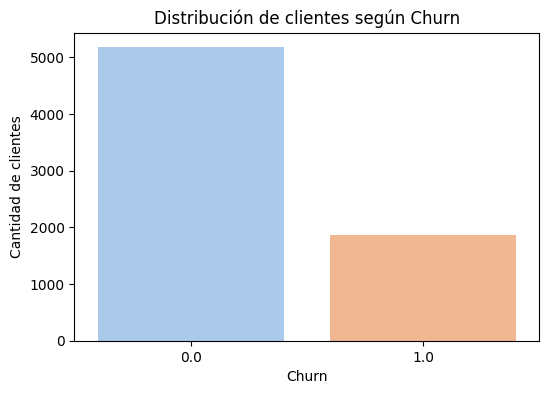

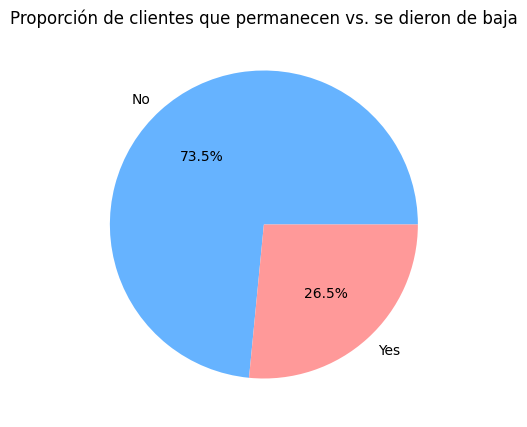

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Churn", palette="pastel")
plt.title("Distribución de clientes según Churn")
plt.xlabel("Churn")
plt.ylabel("Cantidad de clientes")
plt.show()


plt.figure(figsize=(5,5))
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%', colors=["#66b3ff","#ff9999"], labels=["No", "Yes"])
plt.title("Proporción de clientes que permanecen vs. se dieron de baja")
plt.ylabel("")
plt.show()


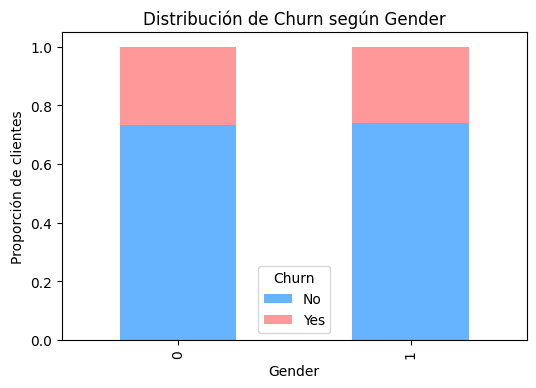

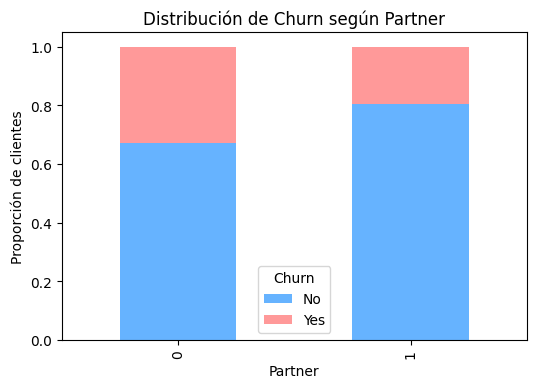

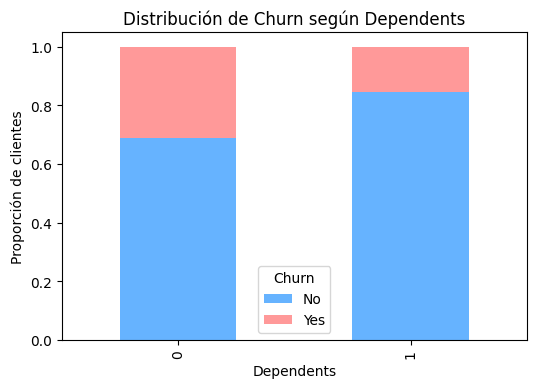

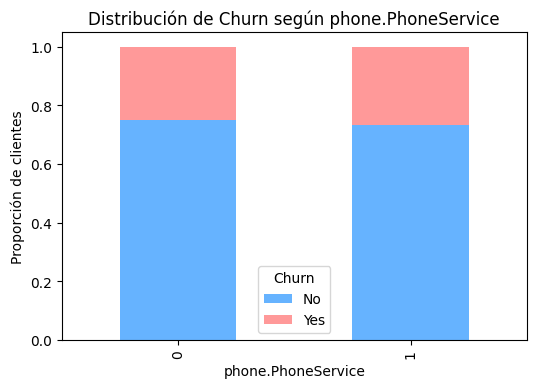

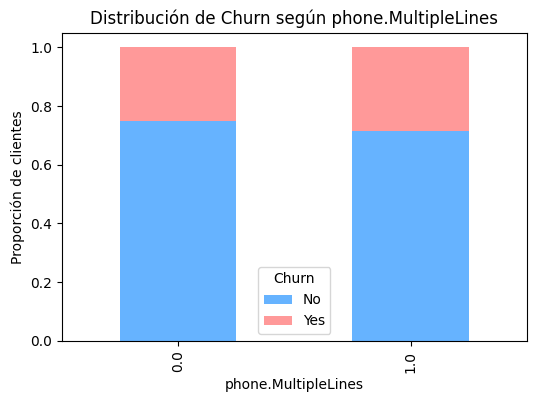

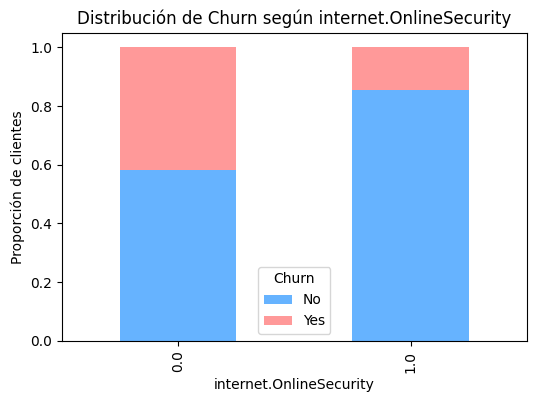

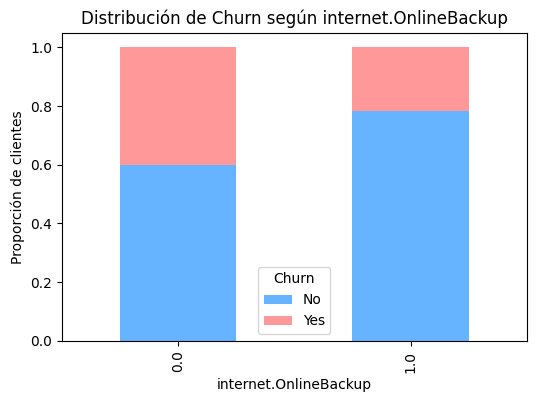

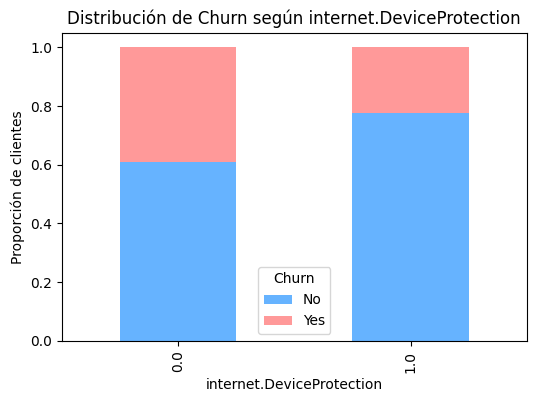

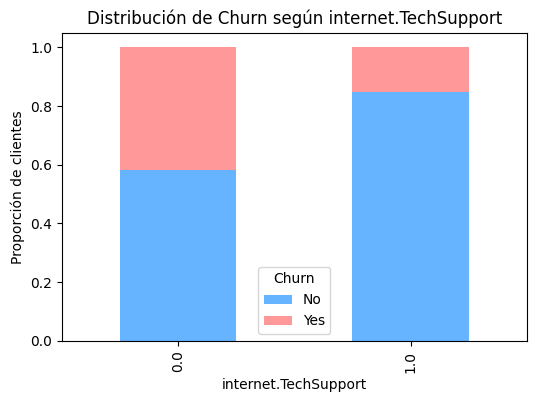

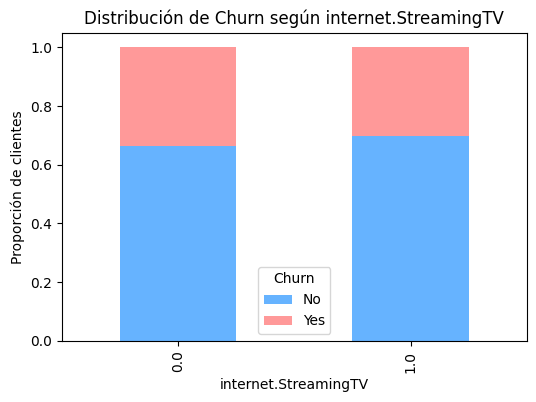

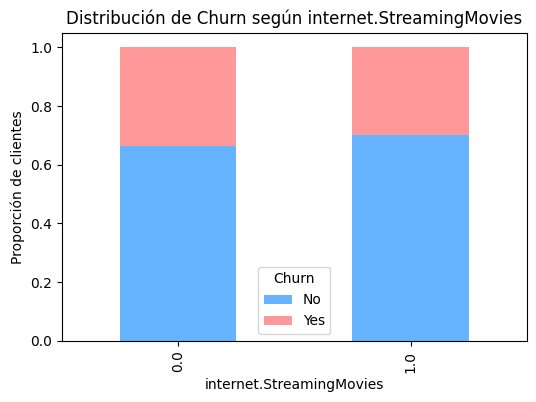

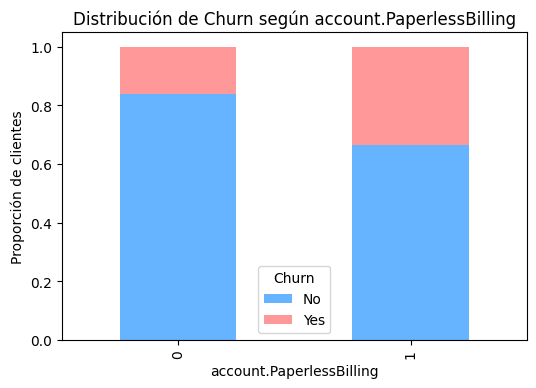

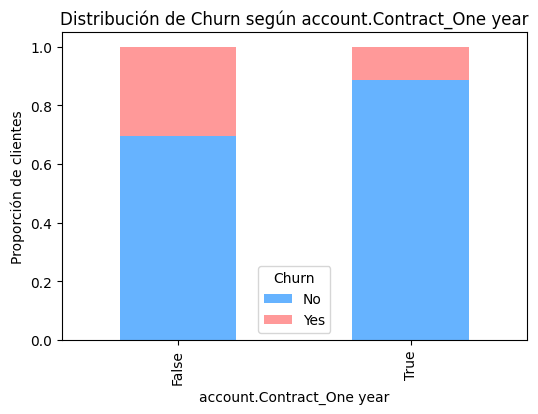

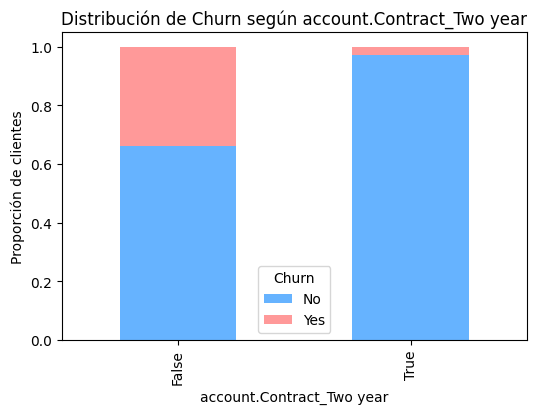

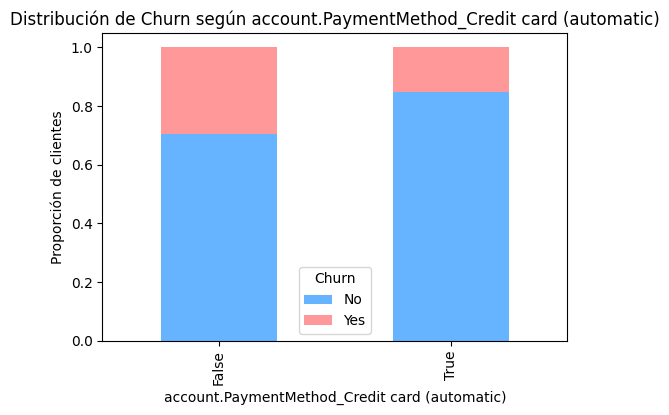

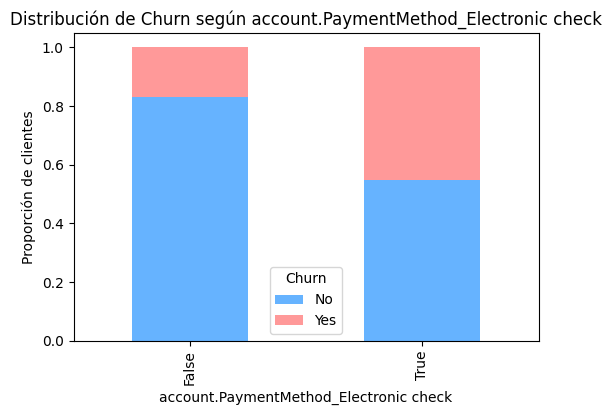

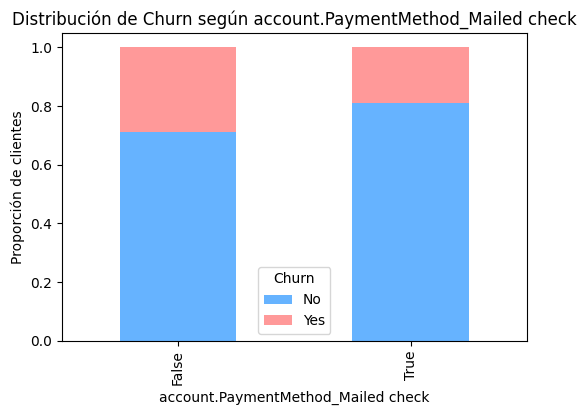

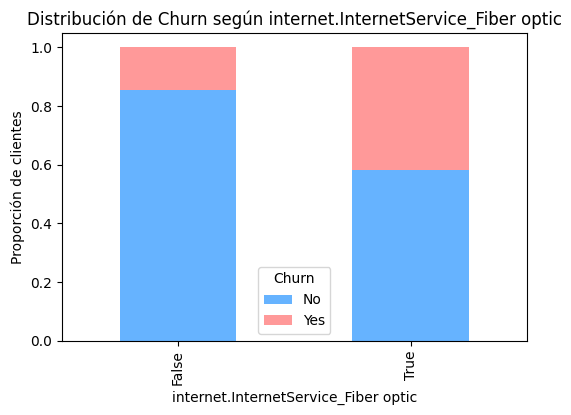

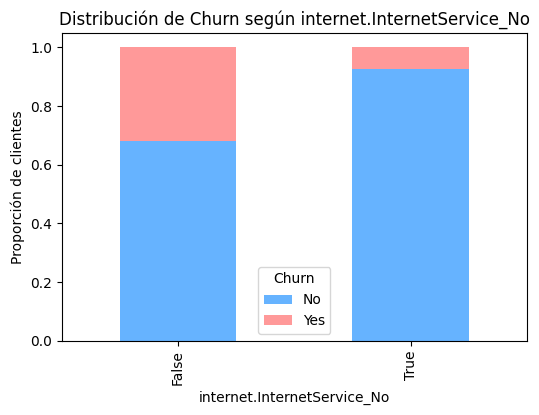

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables binarias categóricas
binarias = [
    "Gender", "Partner", "Dependents",
    "phone.PhoneService", "phone.MultipleLines",
    "internet.OnlineSecurity", "internet.OnlineBackup",
    "internet.DeviceProtection", "internet.TechSupport",
    "internet.StreamingTV", "internet.StreamingMovies",
    "account.PaperlessBilling",
    "account.Contract_One year", "account.Contract_Two year",
    "account.PaymentMethod_Credit card (automatic)",
    "account.PaymentMethod_Electronic check",
    "account.PaymentMethod_Mailed check",
    "internet.InternetService_Fiber optic",
    "internet.InternetService_No"
]

for col in binarias:
    churn_means = df.groupby(col)["Churn"].value_counts(normalize=True).unstack()
    churn_means.plot(kind="bar", stacked=True, figsize=(6,4), color=["#66b3ff","#ff9999"])
    plt.title(f"Distribución de Churn según {col}")
    plt.xlabel(col)
    plt.ylabel("Proporción de clientes")
    plt.legend(title="Churn", labels=["No", "Yes"])
    plt.show()



/tmp/ipython-input-3571636426.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="pastel")


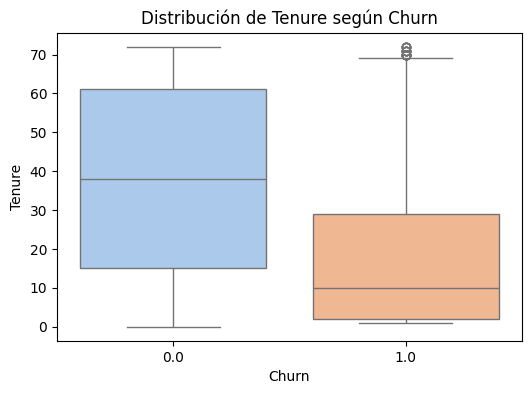

/tmp/ipython-input-3571636426.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="pastel")


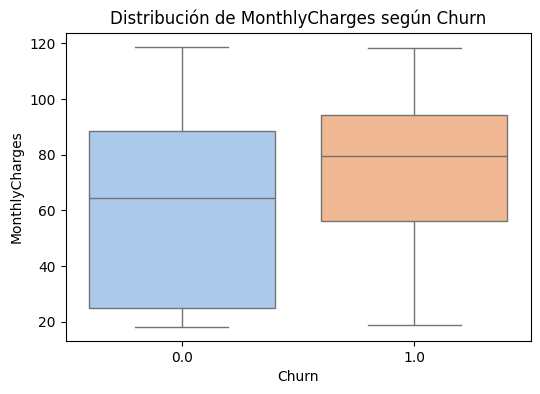

/tmp/ipython-input-3571636426.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="pastel")


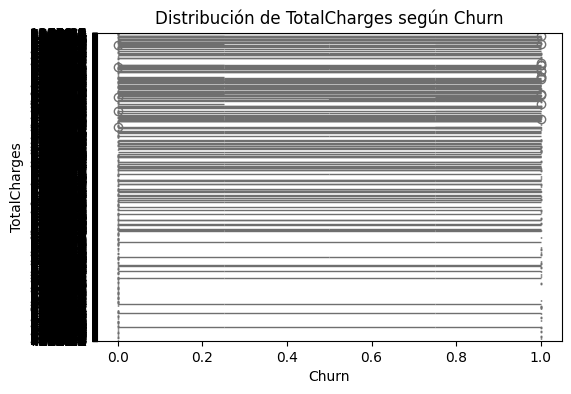

/tmp/ipython-input-3571636426.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="pastel")


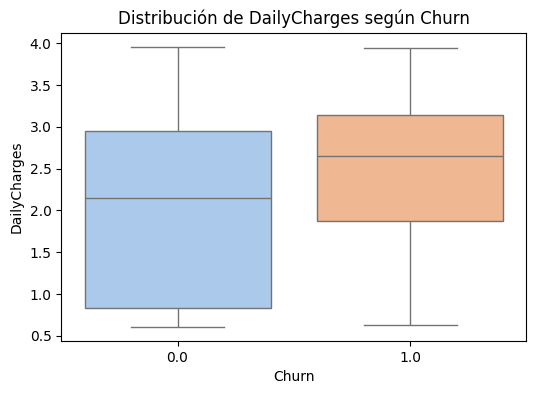

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

numericas = ["Tenure", "MonthlyCharges", "TotalCharges", "DailyCharges"]

for col in numericas:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Churn", y=col, data=df, palette="pastel")
    plt.title(f"Distribución de {col} según Churn")
    plt.xlabel("Churn")
    plt.ylabel(col)
    plt.show()


**EXTRAS**

/tmp/ipython-input-3196090182.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


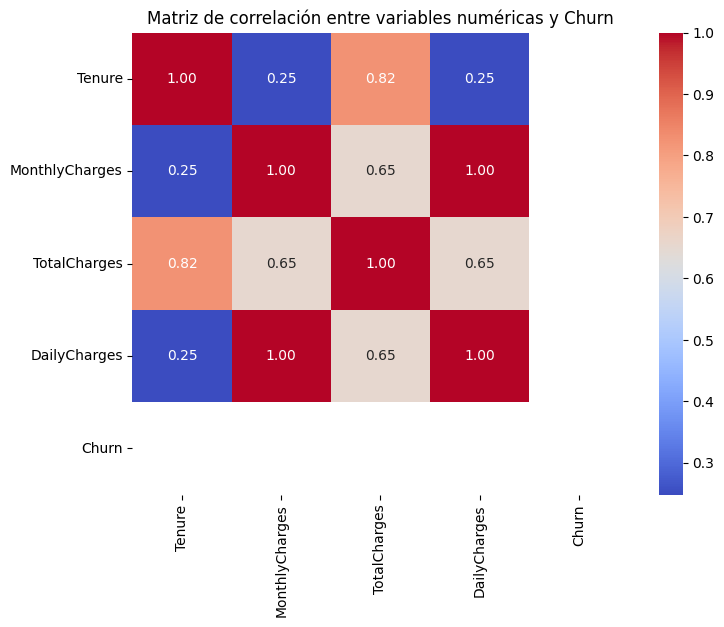

In [22]:
cols_num = ["Tenure", "MonthlyCharges", "TotalCharges", "DailyCharges"]

for col in cols_num:
    df[col] = pd.to_numeric(df[col], errors='coerce')

for col in cols_num:
    df[col].fillna(df[col].median(), inplace=True)

df_corr = df[cols_num + ["Churn"]].copy()
df_corr["Churn"] = df_corr["Churn"].map({"No":0, "Yes":1})

corr_matrix = df_corr.corr()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre variables numéricas y Churn")
plt.show()



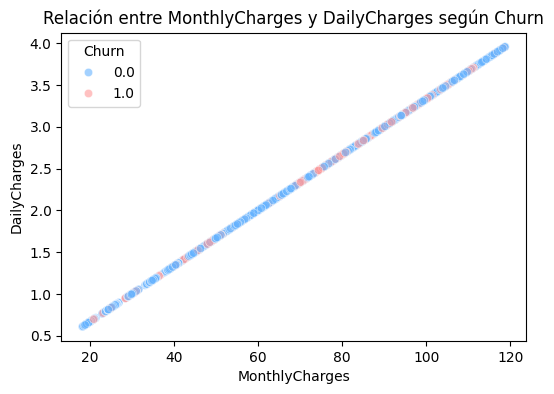

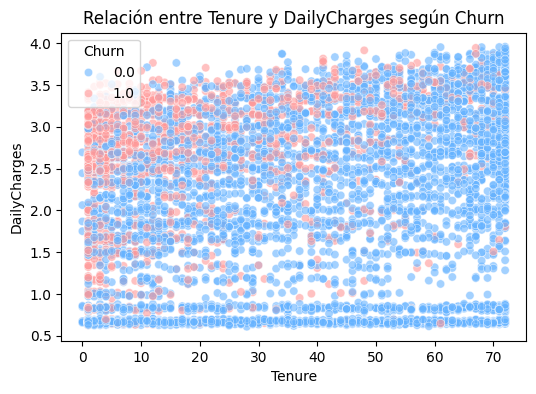

In [23]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="MonthlyCharges", y="DailyCharges", hue="Churn", palette=["#66b3ff","#ff9999"], alpha=0.6)
plt.title("Relación entre MonthlyCharges y DailyCharges según Churn")
plt.xlabel("MonthlyCharges")
plt.ylabel("DailyCharges")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Tenure", y="DailyCharges", hue="Churn", palette=["#66b3ff","#ff9999"], alpha=0.6)
plt.title("Relación entre Tenure y DailyCharges según Churn")
plt.xlabel("Tenure")
plt.ylabel("DailyCharges")
plt.show()


/tmp/ipython-input-1283238657.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="NumServicios", data=df, palette="pastel")


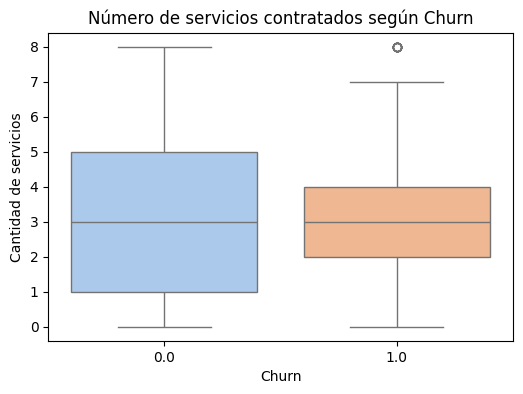

In [24]:
servicios = [
    "phone.PhoneService", "phone.MultipleLines",
    "internet.OnlineSecurity", "internet.OnlineBackup",
    "internet.DeviceProtection", "internet.TechSupport",
    "internet.StreamingTV", "internet.StreamingMovies"
]

df["NumServicios"] = df[servicios].sum(axis=1)

plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="NumServicios", data=df, palette="pastel")
plt.title("Número de servicios contratados según Churn")
plt.xlabel("Churn")
plt.ylabel("Cantidad de servicios")
plt.show()


# INFORME FINAL


# Informe de Análisis de Churn – Telecom X

## 1. Introducción
El objetivo del análisis es comprender los factores que llevan a la **evasión de clientes (Churn)** en Telecom X.  
Una alta tasa de cancelaciones impacta la rentabilidad y la planificación de estrategias de retención.  
Este estudio busca identificar patrones y relaciones entre las características de los clientes y su probabilidad de abandonar el servicio.



## 2. Limpieza y Tratamiento de Datos
Pasos realizados:

1. Importación de datos desde la API en formato JSON.
2. Normalización de estructuras anidadas en columnas planas.
3. Conversión de columnas numéricas ('MonthlyCharges', 'TotalCharges', 'DailyCharges') a float, reemplazando valores inválidos por la mediana.
4. Creación de variables adicionales:
   - `DailyCharges`: facturación diaria.
   - `NumServicios`: número de servicios contratados (TV, Internet, soporte, backups).
5. Transformación de valores binarios (`Yes`/`No`) a 1/0.
6. One-hot encoding de variables categóricas como contrato, método de pago e InternetService.


## 3. Análisis Exploratorio de Datos (EDA)

### 3.1 Distribución de Churn

/tmp/ipython-input-1966178873.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Churn", palette="pastel")


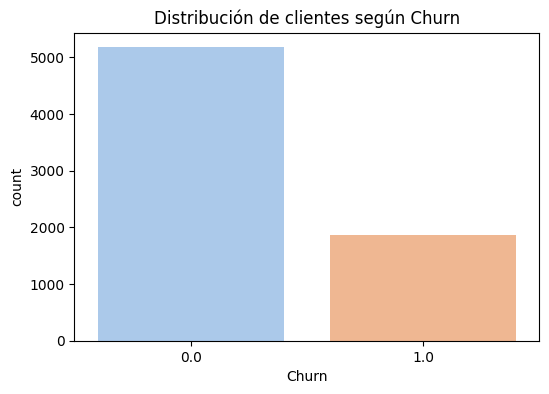

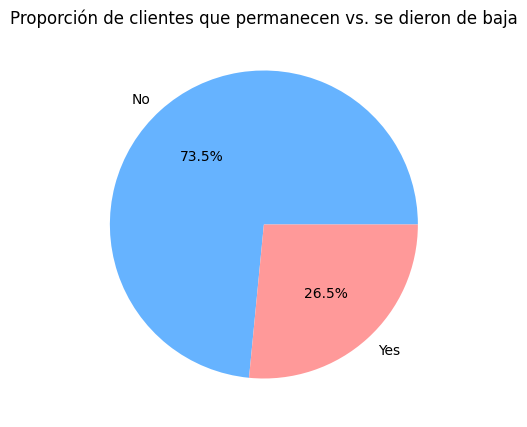

### 3.2 Churn según variables categóricas

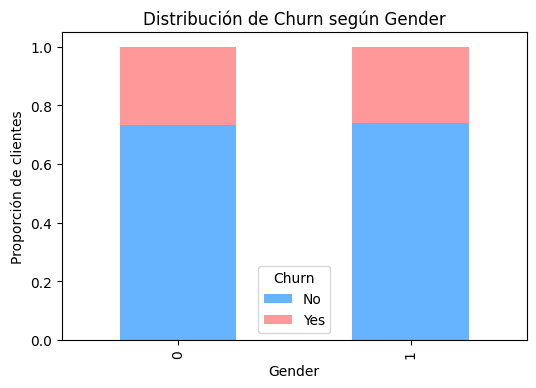

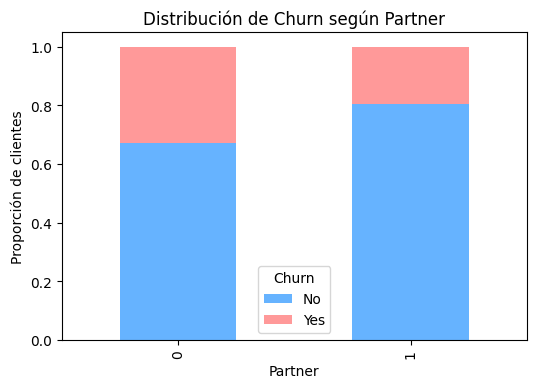

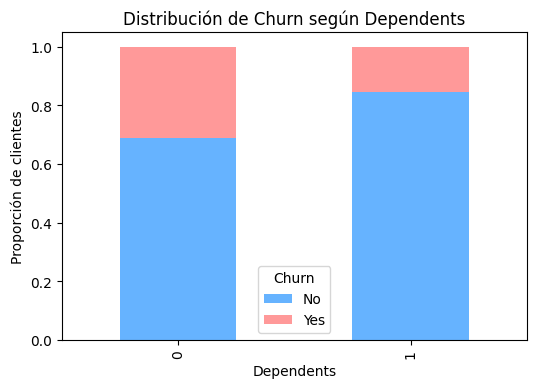

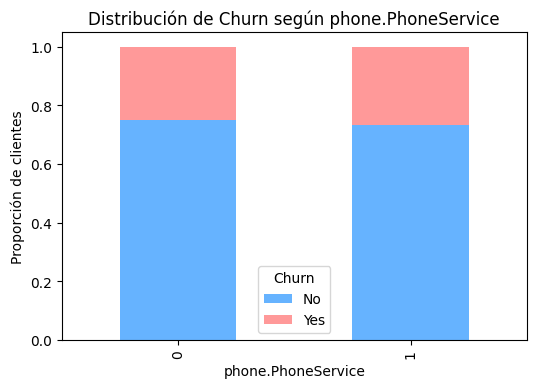

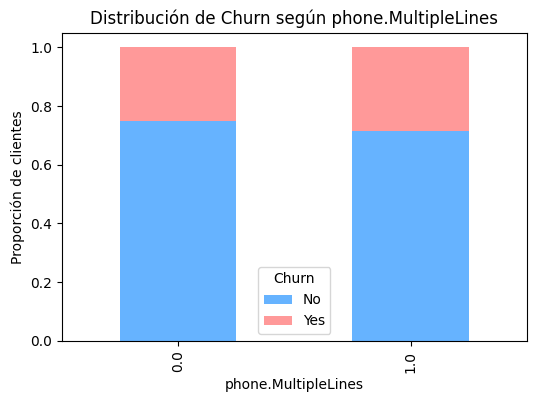

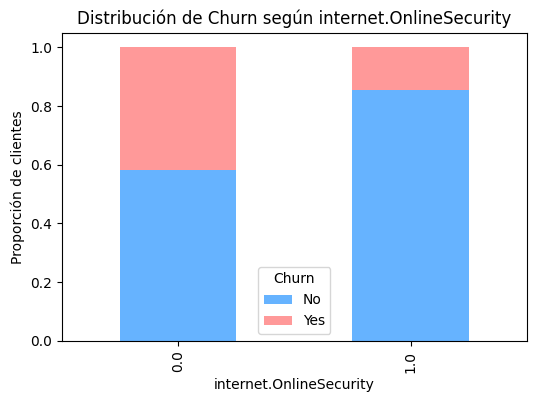

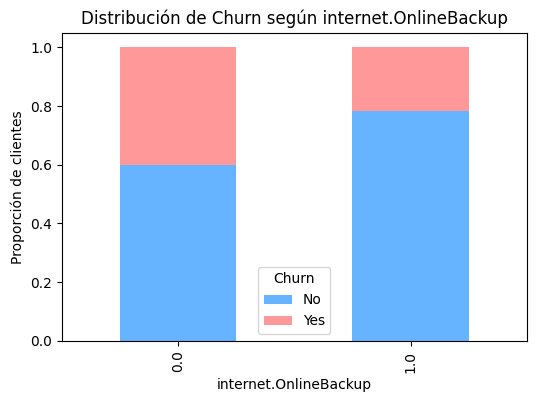

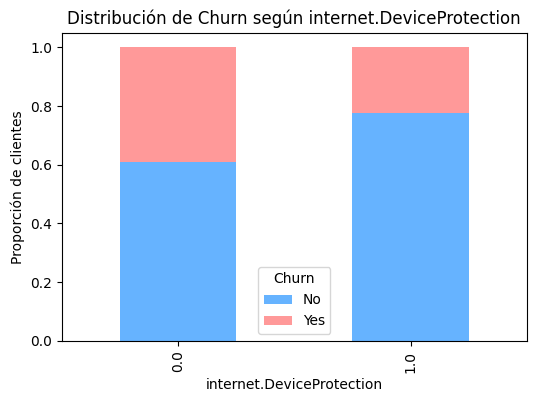

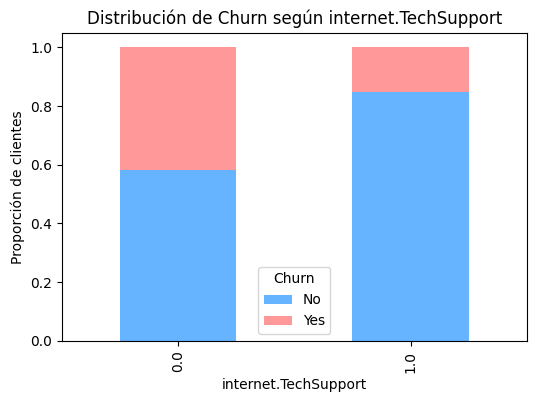

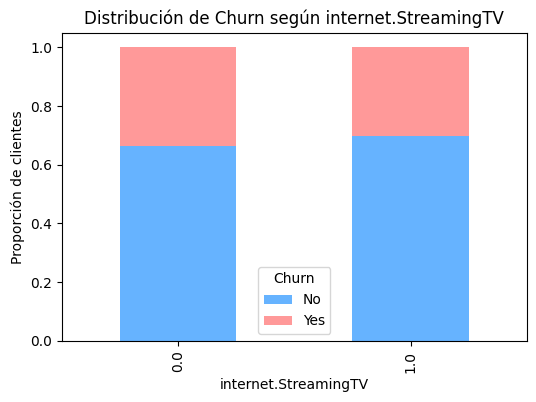

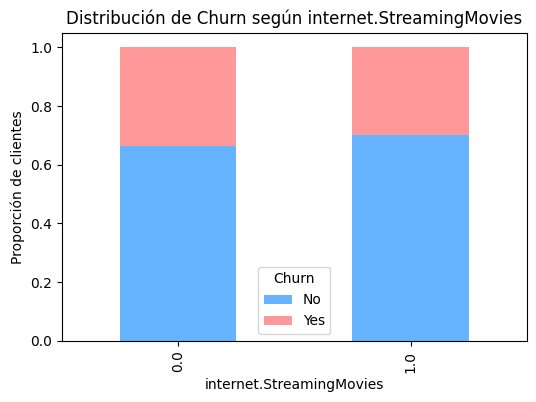

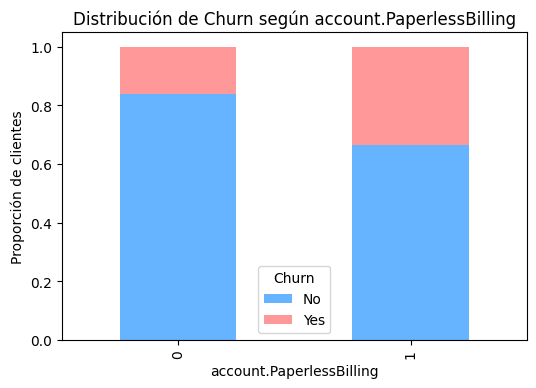

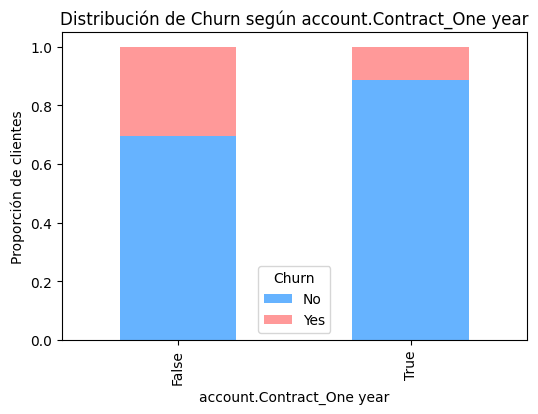

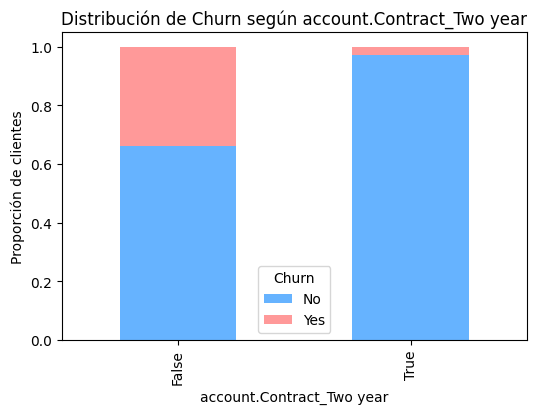

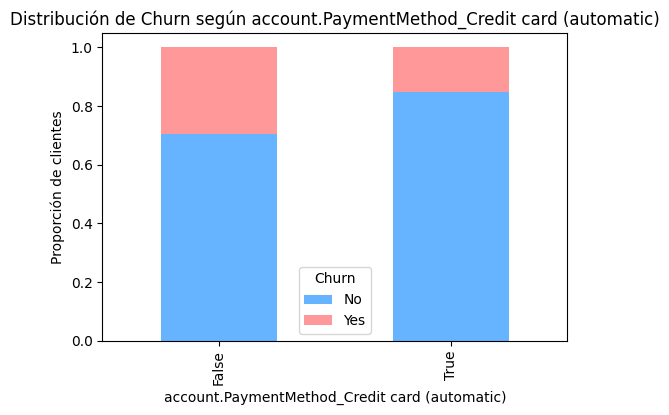

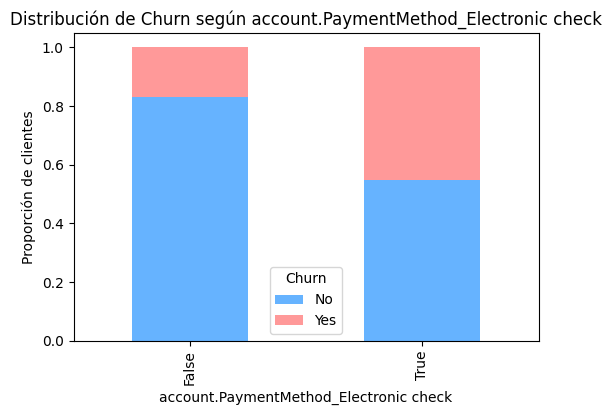

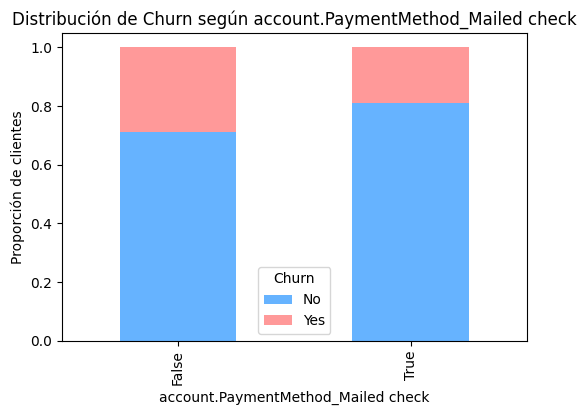

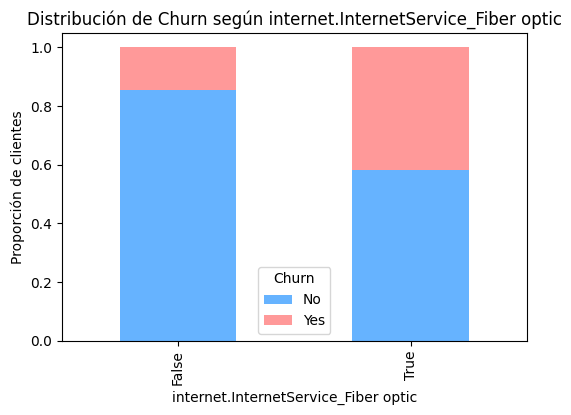

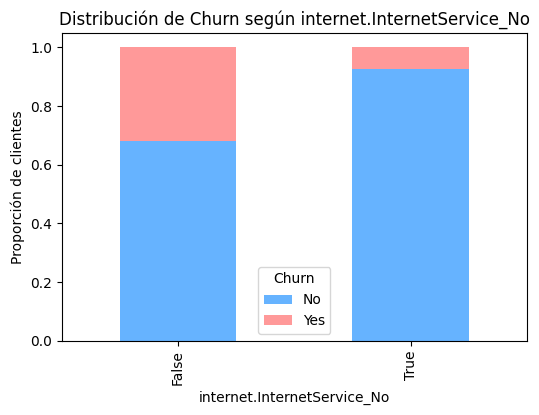

### 3.3 Análisis de variables numéricas

/tmp/ipython-input-1966178873.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="pastel")


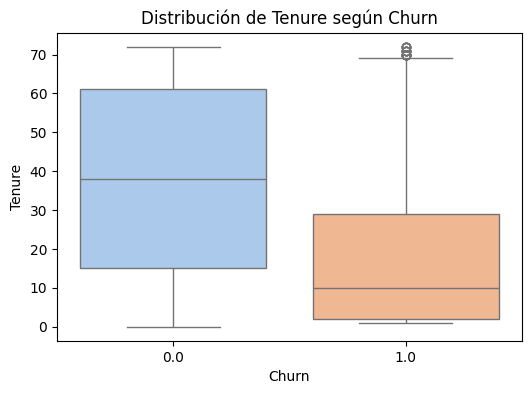

/tmp/ipython-input-1966178873.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="pastel")


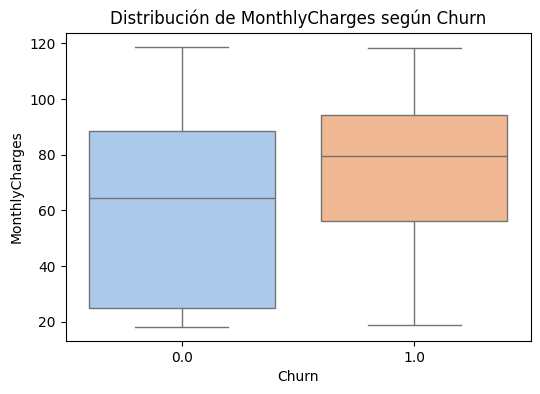

/tmp/ipython-input-1966178873.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="pastel")


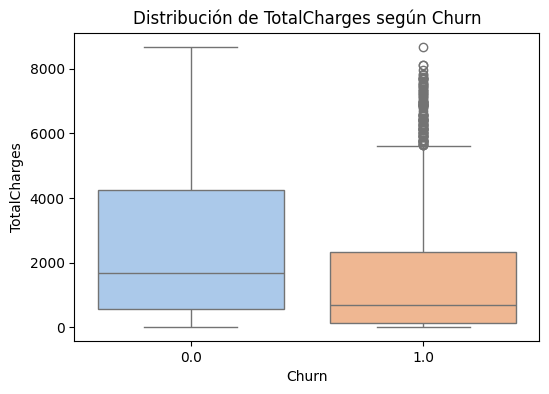

/tmp/ipython-input-1966178873.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="pastel")


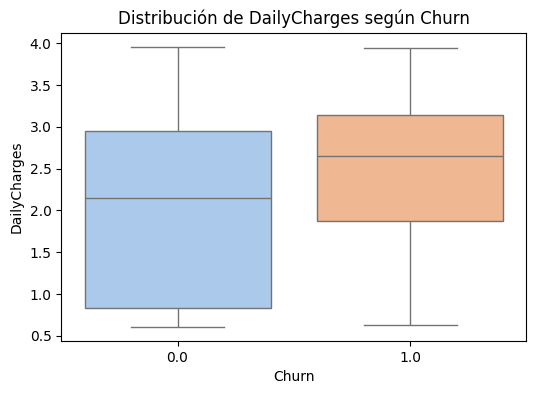

## 4. Análisis de Correlaciones

/tmp/ipython-input-1966178873.py:83: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


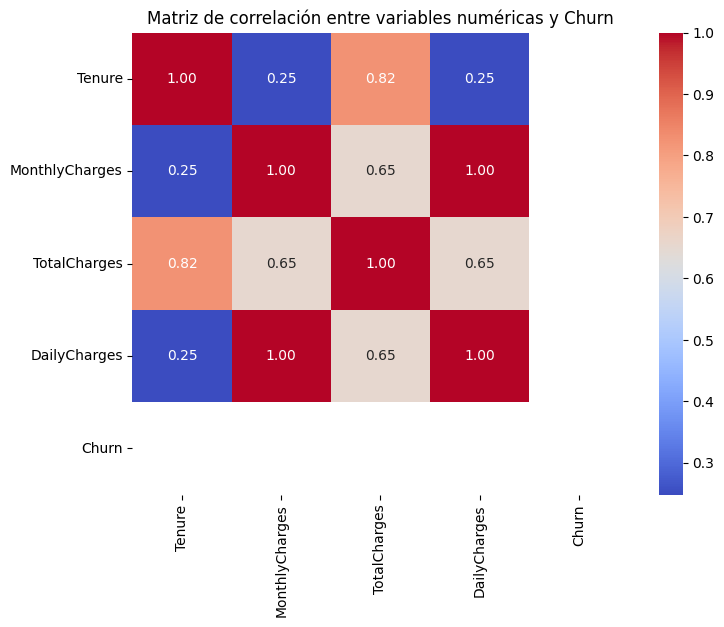

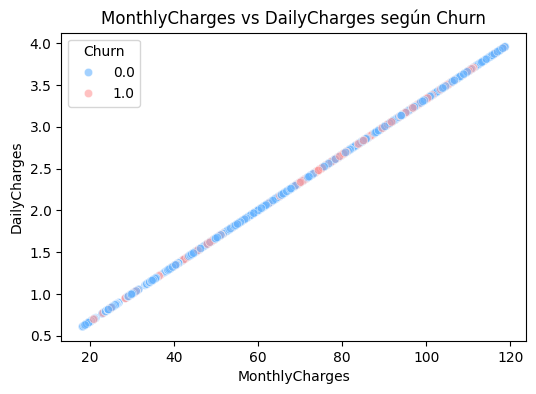

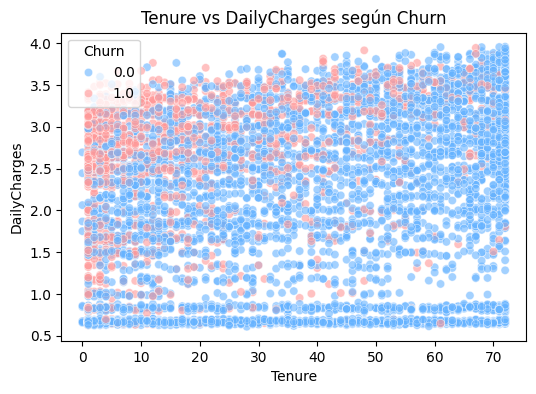

/tmp/ipython-input-1966178873.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="NumServicios", data=df, palette="pastel")


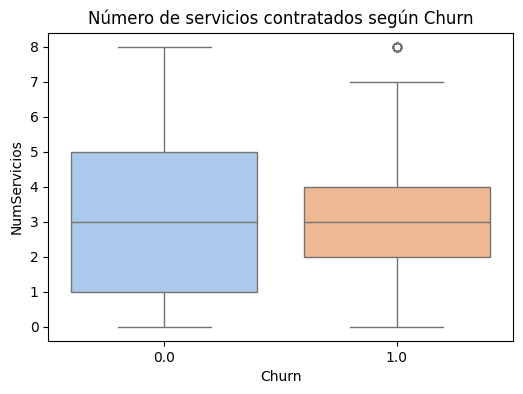


## 5. Conclusiones e Insights
- La **tenencia corta** y contratos mensuales están asociados a mayor churn.
- Algunos métodos de pago y tipos de servicios se relacionan con la evasión.
- Clientes con **menos servicios** tienen mayor probabilidad de cancelar.
- La creación de `DailyCharges` permite ver el gasto diario y patrones de riesgo.



## 6. Recomendaciones Estratégicas
1. Promociones de fidelización para clientes con contratos cortos.
2. Incentivos o mejoras de servicio para clientes con menos servicios contratados.
3. Alertas tempranas basadas en consumo diario irregular.
4. Desarrollar un modelo predictivo de Churn usando estas variables para identificar clientes en riesgo.


In [25]:

from IPython.display import display, Markdown

display(Markdown("""
# Informe de Análisis de Churn – Telecom X

## 1. Introducción
El objetivo del análisis es comprender los factores que llevan a la **evasión de clientes (Churn)** en Telecom X.
Una alta tasa de cancelaciones impacta la rentabilidad y la planificación de estrategias de retención.
Este estudio busca identificar patrones y relaciones entre las características de los clientes y su probabilidad de abandonar el servicio.
"""))

display(Markdown("""
## 2. Limpieza y Tratamiento de Datos
Pasos realizados:

1. Importación de datos desde la API en formato JSON.
2. Normalización de estructuras anidadas en columnas planas.
3. Conversión de columnas numéricas ('MonthlyCharges', 'TotalCharges', 'DailyCharges') a float, reemplazando valores inválidos por la mediana.
4. Creación de variables adicionales:
   - `DailyCharges`: facturación diaria.
   - `NumServicios`: número de servicios contratados (TV, Internet, soporte, backups).
5. Transformación de valores binarios (`Yes`/`No`) a 1/0.
6. One-hot encoding de variables categóricas como contrato, método de pago e InternetService.
"""))


display(Markdown("## 3. Análisis Exploratorio de Datos (EDA)"))

import matplotlib.pyplot as plt
import seaborn as sns


display(Markdown("### 3.1 Distribución de Churn"))
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Churn", palette="pastel")
plt.title("Distribución de clientes según Churn")
plt.show()

plt.figure(figsize=(5,5))
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%', colors=["#66b3ff","#ff9999"], labels=["No", "Yes"])
plt.title("Proporción de clientes que permanecen vs. se dieron de baja")
plt.ylabel("")
plt.show()

display(Markdown("### 3.2 Churn según variables categóricas"))
categoricas = [
    "Gender", "Partner", "Dependents",
    "phone.PhoneService", "phone.MultipleLines",
    "internet.OnlineSecurity", "internet.OnlineBackup",
    "internet.DeviceProtection", "internet.TechSupport",
    "internet.StreamingTV", "internet.StreamingMovies",
    "account.PaperlessBilling",
    "account.Contract_One year", "account.Contract_Two year",
    "account.PaymentMethod_Credit card (automatic)",
    "account.PaymentMethod_Electronic check",
    "account.PaymentMethod_Mailed check",
    "internet.InternetService_Fiber optic",
    "internet.InternetService_No"
]

for col in categoricas:
    churn_means = df.groupby(col)["Churn"].value_counts(normalize=True).unstack()
    churn_means.plot(kind="bar", stacked=True, figsize=(6,4), color=["#66b3ff","#ff9999"])
    plt.title(f"Distribución de Churn según {col}")
    plt.xlabel(col)
    plt.ylabel("Proporción de clientes")
    plt.legend(title="Churn", labels=["No", "Yes"])
    plt.show()

display(Markdown("### 3.3 Análisis de variables numéricas"))
numericas = ["Tenure", "MonthlyCharges", "TotalCharges", "DailyCharges"]

for col in numericas:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Churn", y=col, data=df, palette="pastel")
    plt.title(f"Distribución de {col} según Churn")
    plt.show()

display(Markdown("## 4. Análisis de Correlaciones"))

for col in numericas:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col].fillna(df[col].median(), inplace=True)

df_corr = df[numericas + ["Churn"]].copy()
df_corr["Churn"] = df_corr["Churn"].map({"No":0, "Yes":1})

corr_matrix = df_corr.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre variables numéricas y Churn")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="MonthlyCharges", y="DailyCharges", hue="Churn", palette=["#66b3ff","#ff9999"], alpha=0.6)
plt.title("MonthlyCharges vs DailyCharges según Churn")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Tenure", y="DailyCharges", hue="Churn", palette=["#66b3ff","#ff9999"], alpha=0.6)
plt.title("Tenure vs DailyCharges según Churn")
plt.show()

servicios = [
    "phone.PhoneService", "phone.MultipleLines",
    "internet.OnlineSecurity", "internet.OnlineBackup",
    "internet.DeviceProtection", "internet.TechSupport",
    "internet.StreamingTV", "internet.StreamingMovies"
]
df["NumServicios"] = df[servicios].sum(axis=1)

plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="NumServicios", data=df, palette="pastel")
plt.title("Número de servicios contratados según Churn")
plt.show()

display(Markdown("""
## 5. Conclusiones e Insights
- La **tenencia corta** y contratos mensuales están asociados a mayor churn.
- Algunos métodos de pago y tipos de servicios se relacionan con la evasión.
- Clientes con **menos servicios** tienen mayor probabilidad de cancelar.
- La creación de `DailyCharges` permite ver el gasto diario y patrones de riesgo.
"""))

display(Markdown("""
## 6. Recomendaciones Estratégicas
1. Promociones de fidelización para clientes con contratos cortos.
2. Incentivos o mejoras de servicio para clientes con menos servicios contratados.
3. Alertas tempranas basadas en consumo diario irregular.
4. Desarrollar un modelo predictivo de Churn usando estas variables para identificar clientes en riesgo.
"""))


In [26]:
df.to_csv("TelecomX_datos_tratados.csv", index=False)

print("Archivo CSV creado con éxito: TelecomX_datos_tratados.csv")

Archivo CSV creado con éxito: TelecomX_datos_tratados.csv
